In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import missingno
import re
import chardet
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [2]:
train=pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv")
test=pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv")
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


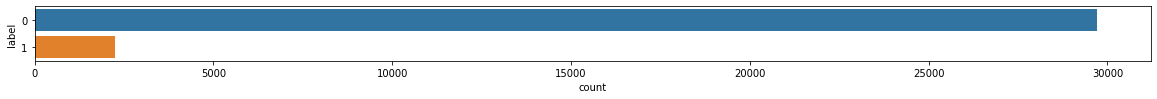

In [5]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='label', data=train);

In [6]:
(train.label.value_counts() / len(train))*100
#percentage of mean tweets


0    92.98542
1     7.01458
Name: label, dtype: float64

<AxesSubplot:>

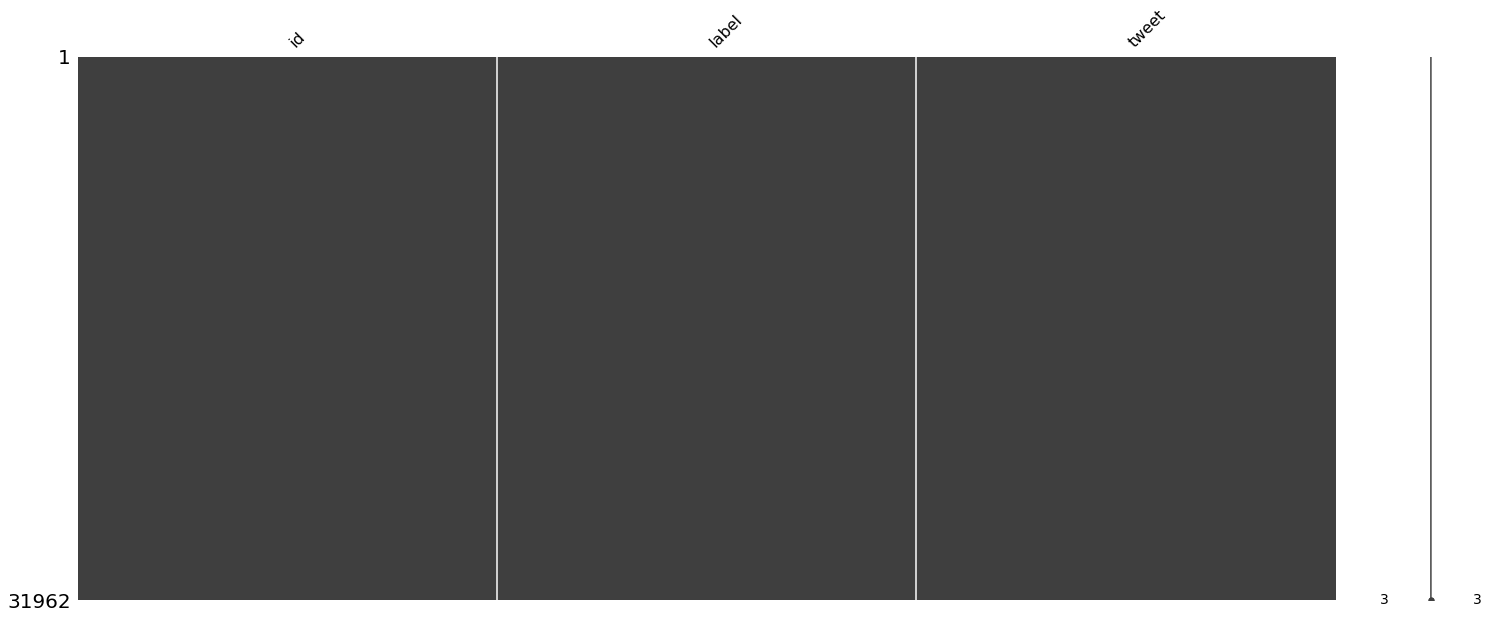

In [7]:
missingno.matrix(train)


In [8]:
train.duplicated().value_counts()

False    31962
dtype: int64

In [9]:
my_set = set()
df=train
df["tweetch"]=train["tweet"].replace(r'[^A-Za-z0-9]', ' ',regex=True)
#result = re.sub(r'[^A-Za-z]', '', lambda row : , axis = 1)
df['hashtag']=df.tweet.str.findall(r'#(\w+)')
df.head(20)
df

,id,label,tweet,tweetch,hashtag
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,[run]
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...,"[lyft, disapointed, getthanked]"
2,3,0,bihday your majesty,bihday your majesty,[]
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,[model]
4,5,0,factsguide: society now #motivation,factsguide society now motivation,[motivation]
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate user isz that youuu ...,[]
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,"[shame, imwithher]"
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,[]
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",user sikh temple vandalised in in calgary ...,"[sikh, temple, calgary, wso]"


id         31962
label      31962
tweet      31962
tweetch    31962
hashtag    31962
dtype: int64


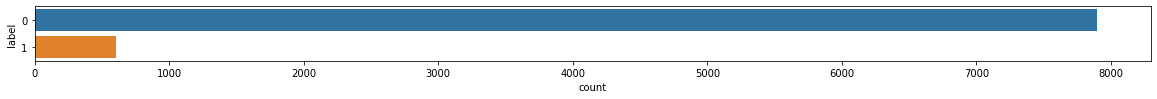

In [10]:
print(train.count())
tr=df[df.hashtag.str.len().eq(0)]
fig = plt.figure(figsize=(20,1))
sns.countplot(y='label', data=tr);

In [11]:
len(train[train['tweet'].str.contains('#girls')])


131

76296
occured less than 100 59377
occured greather than 100 16819


23048

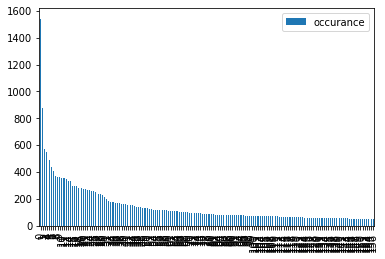

In [12]:
s=train['tweet'].str.findall(r'(#\w+)').explode().value_counts()
s["hashtag"]=s.index
#s=s.reset_index(drop=True)
s=s.reset_index(drop=False)
s = s[:-1]

s['tweet'] = pd.to_numeric(s['tweet'])
print(s.tweet.sum())
print("occured less than 100",s.tweet.loc[s["tweet"]<100].sum())
s=s.loc[s.tweet>50]
print("occured greather than 100",s.tweet.loc[s["tweet"]>100].sum())
s=s.rename(columns={"index": "Hashtag", "tweet": "occurance"})
s["Hashtag"] = s["Hashtag"].str.replace("#", "")

s.sort_index().plot.bar()
s.occurance.sum()

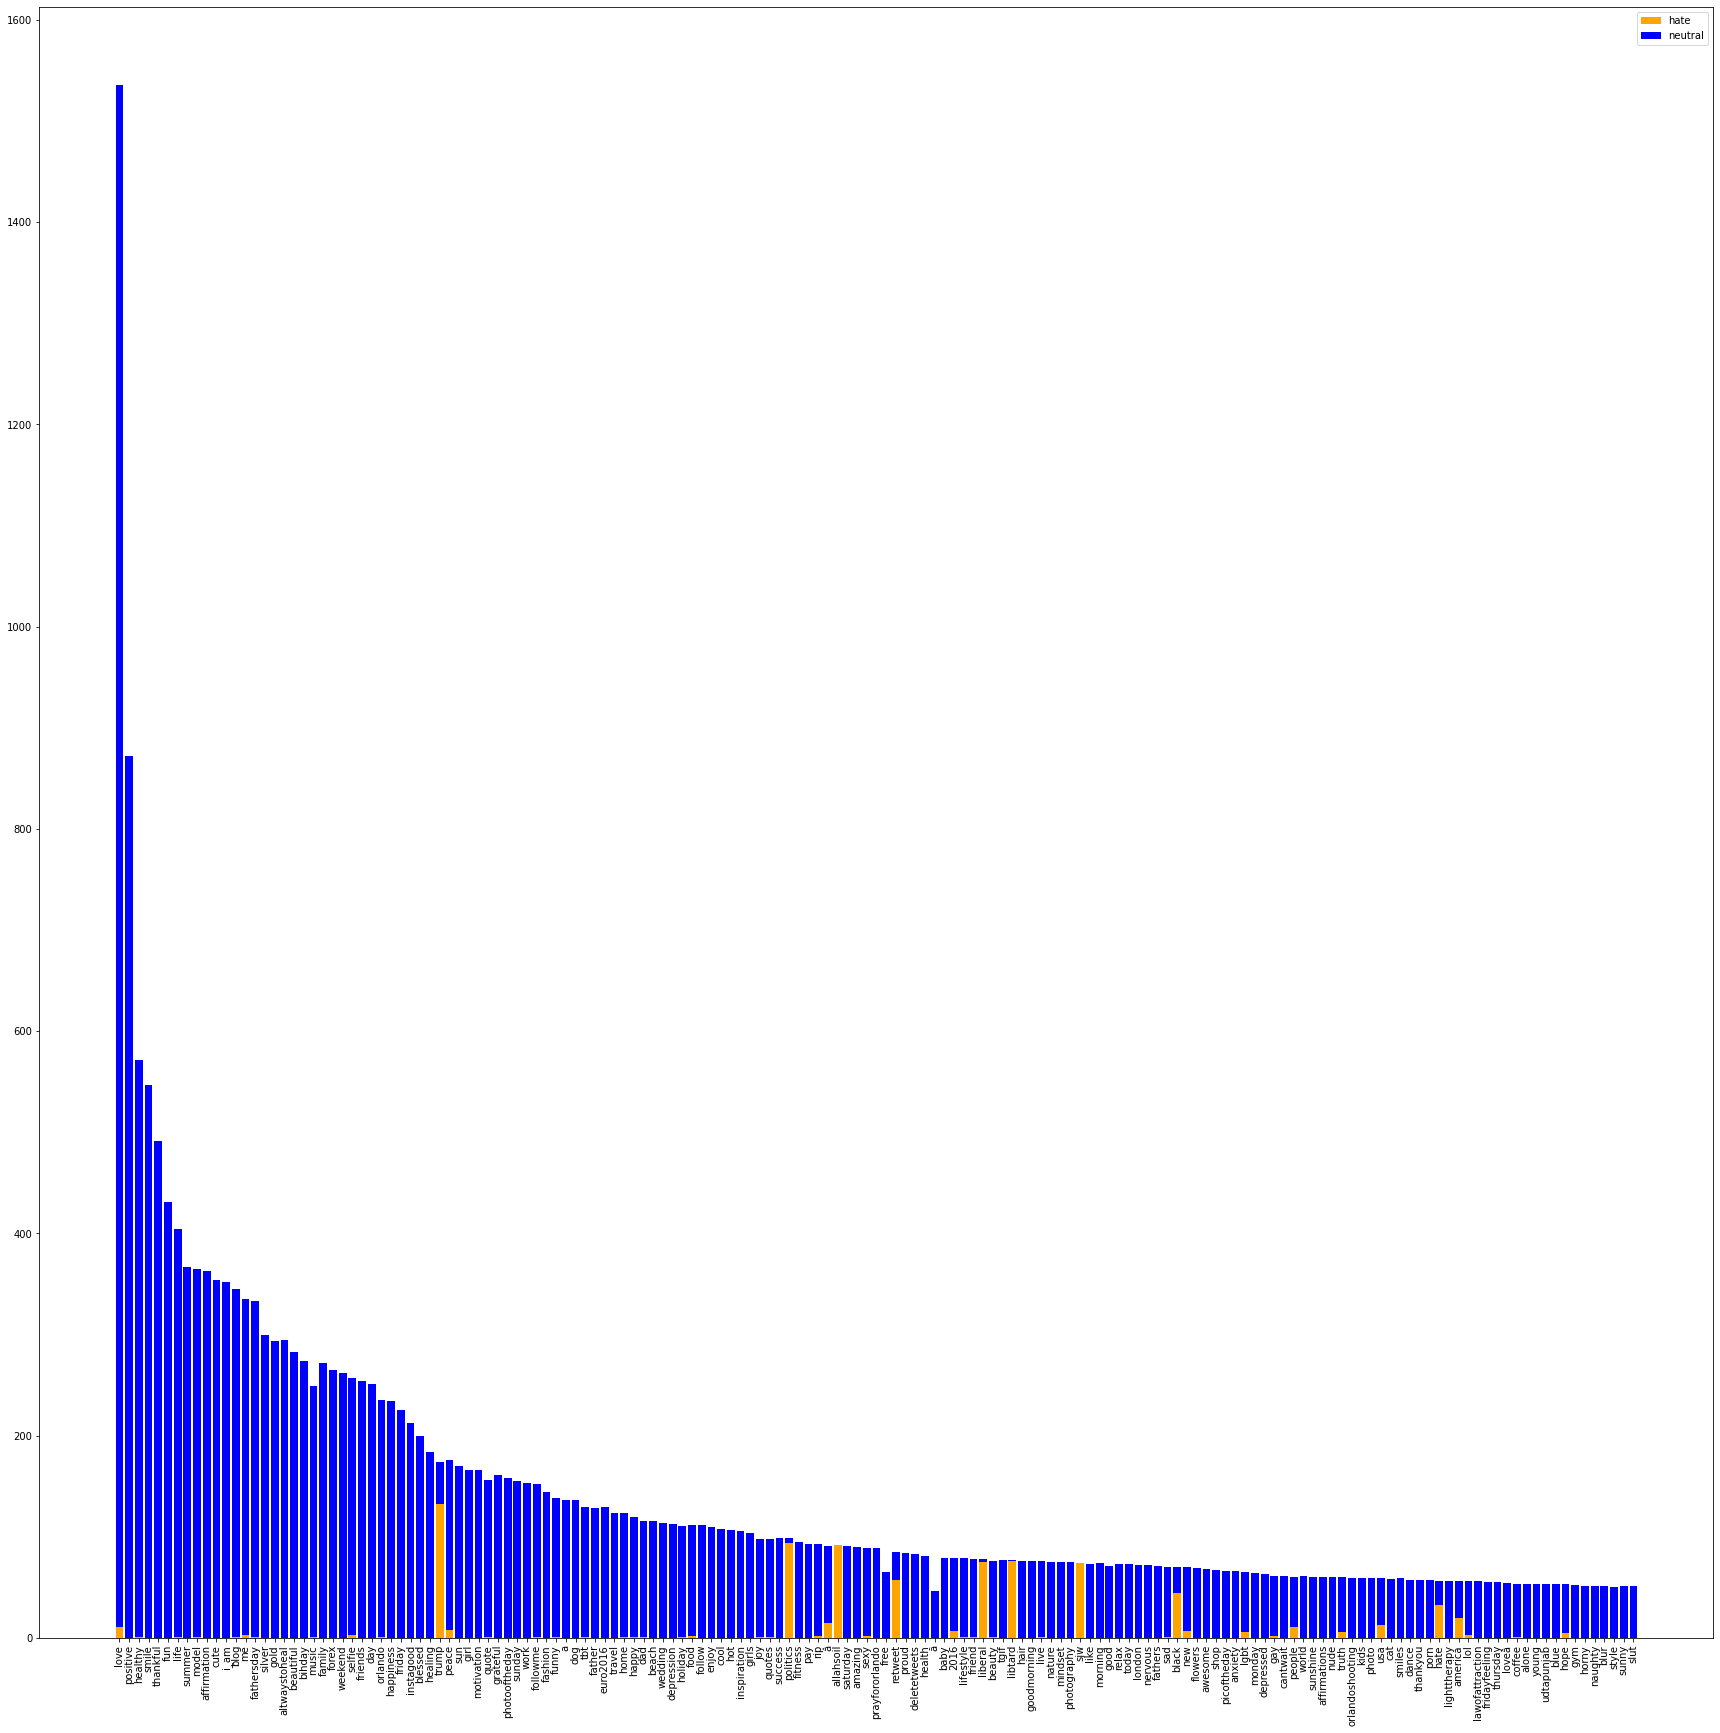

In [13]:
x=[]


hate=[]
neutral=[]
fig = plt.figure(figsize=(30,30))

for tag in s["Hashtag"]: 
    t=df[df['hashtag'].apply(lambda x: tag in x)]
    x.append(tag)
    hate.append(len(t[t["label"]==1]))
    neutral.append(len(t[t["label"]==0]))
plt.xticks(rotation='vertical')
plt.bar(x,hate,label="hate",color="orange")
plt.bar(x,neutral,bottom=hate,label="neutral",color="blue")
plt.legend()


In [14]:
t=df[df['hashtag'].apply(lambda x: "slut" in x)]
x.append(tag)
hate.append(len(t[t["label"]==1]))
neutral.append(len(t[t["label"]==0]))
t.head(100)

,id,label,tweet,tweetch,hashtag
295,296,0,twinklatinboys - na: #slut #snapshot #hot #nas...,twinklatinboys na slut snapshot hot nas...,"[slut, snapshot, hot, nasty, naughty, sexy, ho..."
2866,2867,0,ursexiestmorena - na: #shy #porn #naughty #nud...,ursexiestmorena na shy porn naughty nud...,"[shy, porn, naughty, nude, young, kinky, sexy,..."
3172,3173,0,milkyway24 - na: #kinky #slut #porn #xxx #na...,milkyway24 na kinky slut porn xxx na...,"[kinky, slut, porn, xxx, nasty, young, naughty..."
3411,3412,0,"yuki920 - cooking ,listen to the music ,readin...",yuki920 cooking listen to the music readin...,"[young, kinky, slut, wet, snapshot, horny, nas..."
5126,5127,0,ashley1sweetie - na: #wet #porn #sexy #hot #yo...,ashley1sweetie na wet porn sexy hot yo...,"[wet, porn, sexy, hot, young, nude, horny, nau..."
5146,5147,0,"queenanelisse - i like positive atitude,i like...",queenanelisse i like positive atitude i like...,"[snapshot, shy, nude, slut, na]"
5367,5368,0,nice1girl - na: #horny #slut #kinky #nude #hot...,nice1girl na horny slut kinky nude hot...,"[horny, slut, kinky, nude, hot, nasty, sexy, p..."
5767,5768,0,mattlaw - cultures and cars: #horny #nude #xxx...,mattlaw cultures and cars horny nude xxx...,"[horny, nude, xxx, sexy, kinky, naughty, shy, ..."
6131,6132,0,gentlepassion4u - na: #naughty #shy #slut #n...,gentlepassion4u na naughty shy slut n...,"[naughty, shy, slut, nude, sexy, hot, porn, ho..."
6959,6960,0,11inchlatcock - giving or receiving oral sex w...,11inchlatcock giving or receiving oral sex w...,"[young, nude, slut, hot, naugh]"


In [15]:
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [16]:
X=train['tweet']
y=train['label']
cleaned_data=[]
for i in range(len(X)):
   tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
   tweet=tweet.lower().split()   
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words)]
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X_fin=cv.fit_transform(cleaned_data).toarray()


In [18]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)
model.fit(X_train,y_train)

MultinomialNB()

In [20]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8945
           1       0.57      0.71      0.63       644

    accuracy                           0.94      9589
   macro avg       0.78      0.83      0.80      9589
weighted avg       0.95      0.94      0.95      9589

